<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/estimacion_densidad_por_nucleos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from math import pi, exp, sqrt, ceil

mpl.rcParams["figure.figsize"] = 30, 16 

Algunos núcleos tomados de [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use), y una función de densidad empírica genérica que acepta
- una muestra $X$,
- un núkelo $K$ y
- un ancho de banda $H$

In [ ]:
def indicadora(x, desde, hasta):
    return int(desde <= x <= hasta)

def cuadrado(x):
    return  indicadora(x, -1 , 1) * 1 / 2

def triangular(x):
    return indicadora(x, -1 , 1) * (1 - abs(x))

def epanechnikov(x):
    return indicadora(x, -1 , 1) * 3 / 4 * (1 - x**2)

def gaussiano(x):
    return 1 / sqrt(2 * pi) * exp(- 1 / 2 * x**2)

nucleos = [cuadrado, triangular, epanechnikov, gaussiano]

In [ ]:
def densidad(x, X, nucleo, h=1):
    return ((x - X) / h).apply(nucleo).mean() / h   

Algunas funciones auxiliares para graficar todo

In [ ]:
def getfig(n, rows, cols):
    """Devuelve el enésimo "subplot" de izq a derecha, arriba a abajo."""
    if n >= rows * cols:
        raise ValueError("No hay suficientes figuras")
    else:
        return n // cols, n % cols
        

def plot(X, nucleos, H):
    """
    Grafica la densidad estimada por núcleos para los n `nucleos` y `H` anchos
    de banda a partir de la muestra `X`.
    """
    filas = ceil(len(nucleos) / 2)
    grilla = pd.Series(np.linspace(X.min() - X.std(), X.max() + X.std(), 1000))
    
    mpl.rcParams["figure.figsize"] = 30, 8 * filas
    fig, axs = plt.subplots(filas, 2)
    for i, nucleo in enumerate(nucleos):
        ax = axs[getfig(i, filas, 2)]
        ax.set_title(f"Núcleo {nucleo.__name__}")
        for h in H:
            ax.plot(grilla, grilla.apply(densidad, args=(X, nucleo, h)), label=f"h = {h}")
            ax.legend()
    plt.show()

# ¡Gráficos!
## X = [1, 5, 5.25, 7] (muestra propuesta en clase)

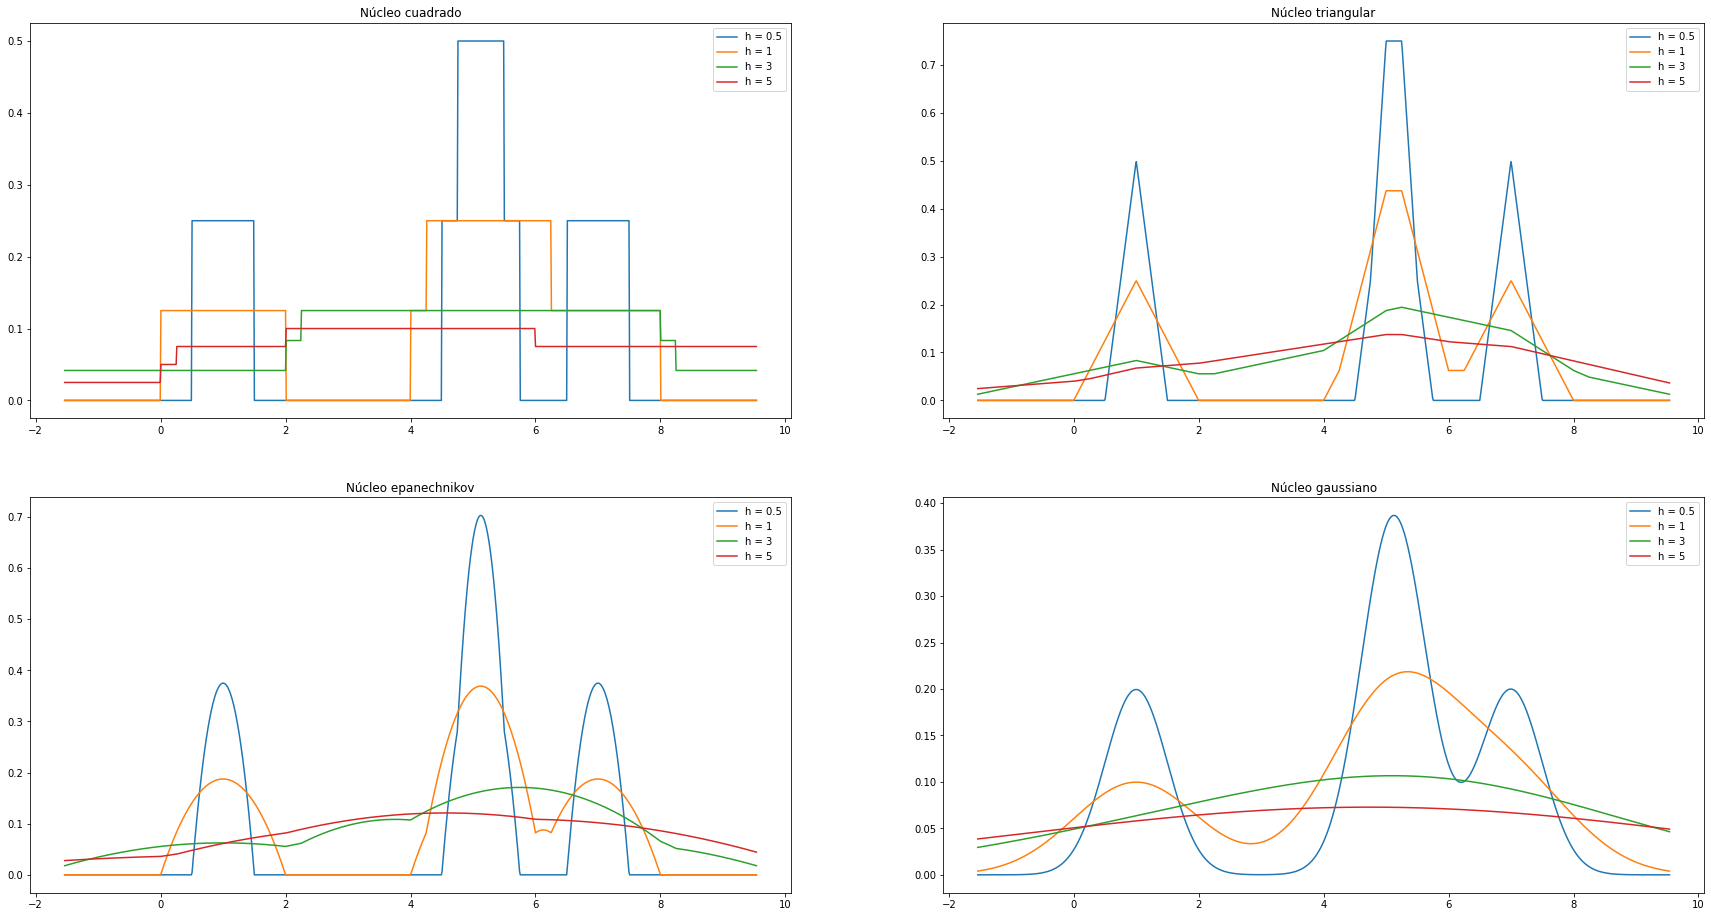

In [ ]:
X = pd.Series([1, 5, 5.25, 7]) # Muestra sobre la cual estimar la densidad
H = [0.5, 1, 3, 5]  # Algunos anchos de banda para probar
plot(X, nucleos, H)

## $X_i \sim_{iid}  N(0, 1) , i \in \{1, \dots, 20\}$

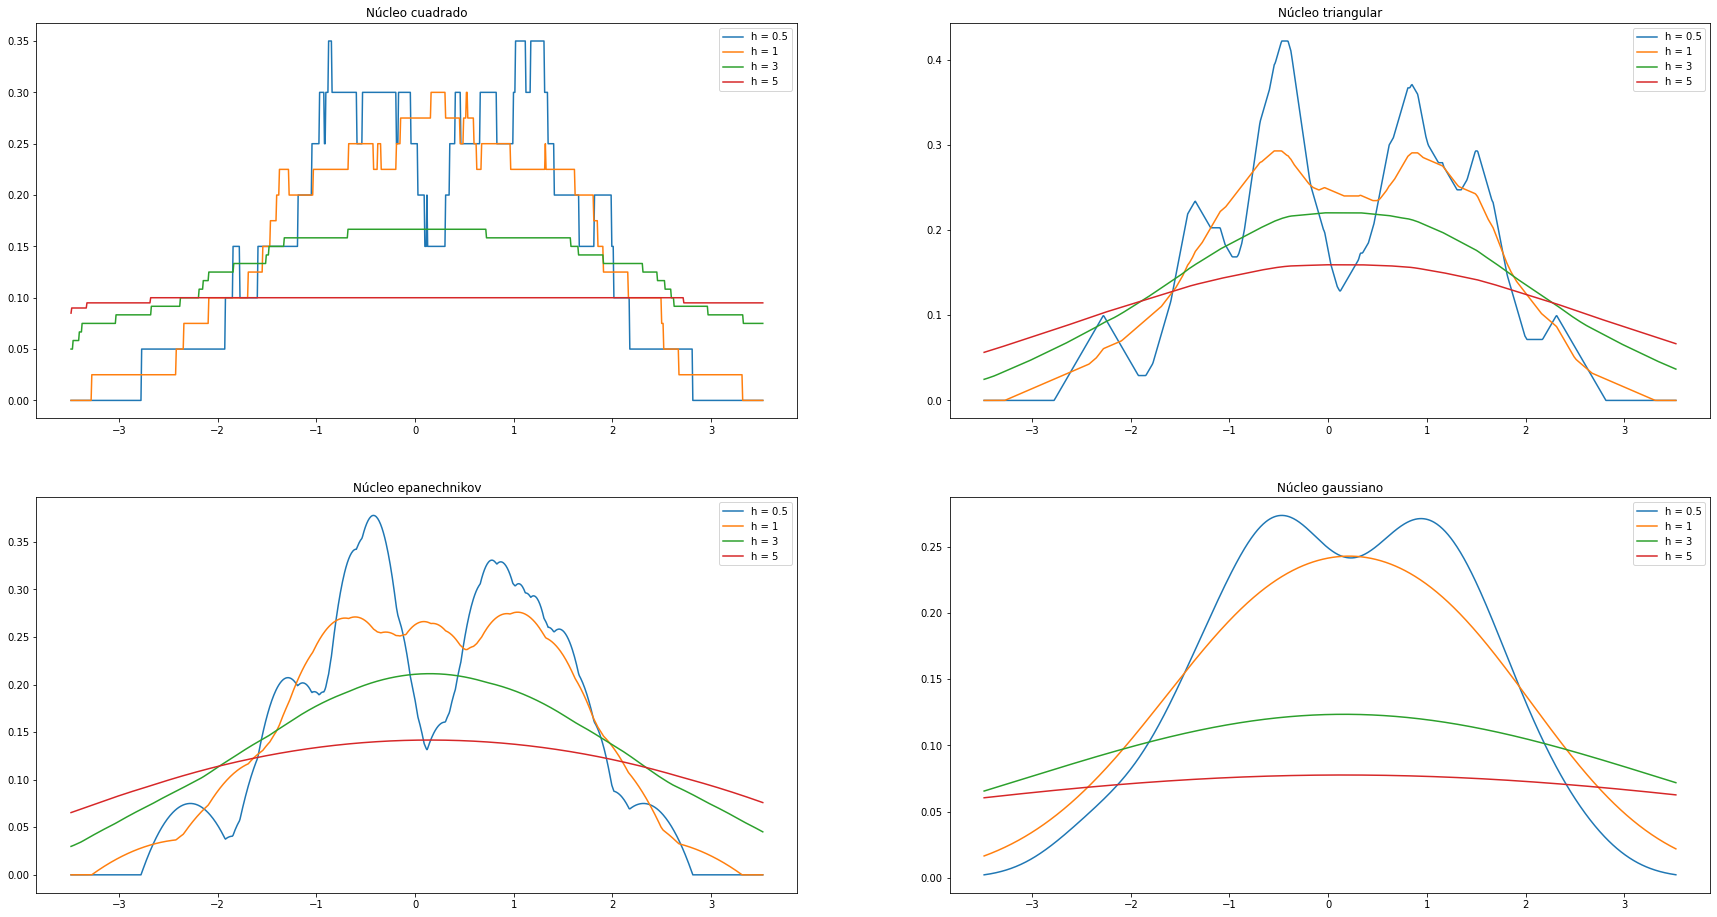

In [ ]:
X = pd.Series(np.random.normal(size=20)) # Muestra de n=20 de poblacion normal estándar
H = [0.5, 1, 3, 5]  # Algunos anchos de banda para probar
plot(X, nucleos, H)

## ¡Y funciona como la del paquete!

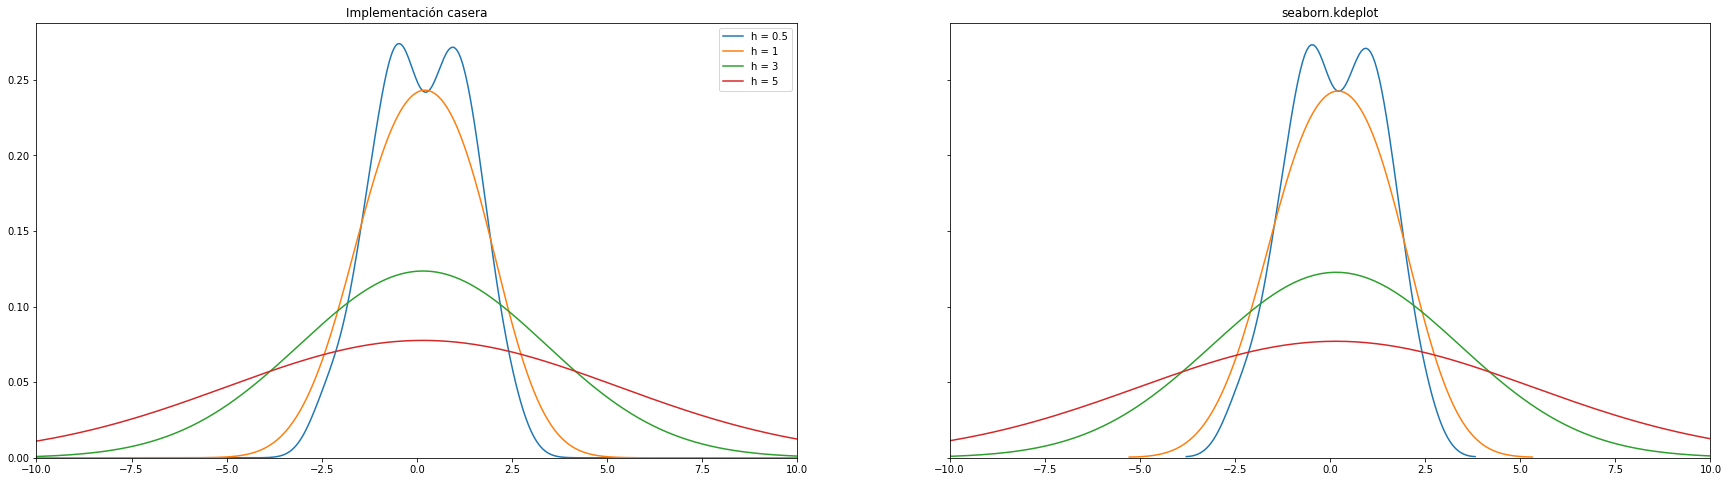

In [ ]:
grilla = pd.Series(np.linspace(-15, 15, 1000))
mpl.rcParams["figure.figsize"] = 30, 8
fig, (nosotros, seaborn) = plt.subplots(1, 2, sharex=True, sharey=True)

nosotros.set_title("Implementación casera")
for h in H:
    nosotros.plot(grilla, grilla.apply(densidad, args=(X, nucleo, h)), label=f"h = {h}")
nosotros.legend()
seaborn.set_title("seaborn.kdeplot")
for h in H:
    sns.kdeplot(X, bw=h, ax=seaborn)
plt.xlim(-10, 10)
plt.show()